<a href="https://colab.research.google.com/github/GarimaPuri94/Online-Payment-Fraud-Prediction/blob/main/Online_Payment_Fraud_Detection_using_Machine_Learning_in_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# **1.** **Importing necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# **2. Reading Data**
We will use pandas `read_csv` function to read the data in csv file.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/GarimaPuri94/Online-Payment-Fraud-Prediction/main/onlinefraud.csv"
Fraud_D = pd.read_csv(url)
Fraud_D.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


# **3. Data Preprocessing**
Data preprocessing is a data mining technique that involves transforming raw data into an understandable format.

In [ ]:
Fraud_D.shape

(1048575, 10)

In [ ]:
Fraud_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [ ]:
# statistical analysis of the data

Fraud_D.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [ ]:
Fraud_D.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [ ]:
Fraud_D.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False


In [ ]:
Fraud_D.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
Fraud_D.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
correlation = Fraud_D.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
Name: isFraud, dtype: float64


<ipython-input-107-5dce401e220a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Fraud_D.corr()


In [ ]:
Fraud_D.notnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
15577,True,True,True,True,True,True,True,True,True,True
15578,True,True,True,True,True,True,True,True,True,True
15579,True,True,True,True,True,True,True,True,True,True
15580,True,True,True,True,True,True,True,True,True,True


**4.** **Data Cleaning**

find outliers and remove them.

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(Fraud_D[i].quantile(0.10))
    print(Fraud_D[i].quantile(0.90))

    print('\n')

amount
4220.57
373075.3779999999


oldbalanceOrg
0.0
1924613.1739999996


newbalanceOrig
0.0
2059503.9359999998


oldbalanceDest
0.0
2721593.4459999995


newbalanceDest
0.0
3102896.2




In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = Fraud_D[i].quantile(0.10)
    upper = Fraud_D[i].quantile(0.90)
    Fraud_D[i] = np.where(Fraud_D[i] <lower, lower,Fraud_D[i])
    Fraud_D[i] = np.where(Fraud_D[i] >upper, upper,Fraud_D[i])
    print('Feature: ',i)
    print('Skewness value: ',Fraud_D[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.7964930444208819


Feature:  oldbalanceOrg
Skewness value:  2.1881516694642875


Feature:  newbalanceOrig
Skewness value:  2.1770209559093807


Feature:  oldbalanceDest
Skewness value:  1.385454781137203


Feature:  newbalanceDest
Skewness value:  1.3046789943177446




In [ ]:
Fraud_D.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


##**5. Data Visualation**

<Axes: title={'center': 'missing data visualization in the dataset'}>

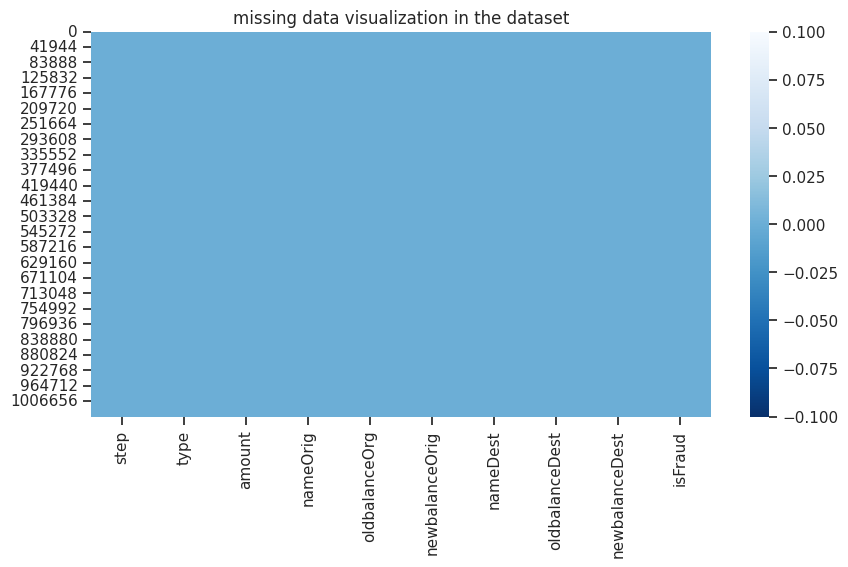

In [ ]:
# To visualize the missing values

plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(Fraud_D.isnull(), cbar =True, cmap= "Blues_r")

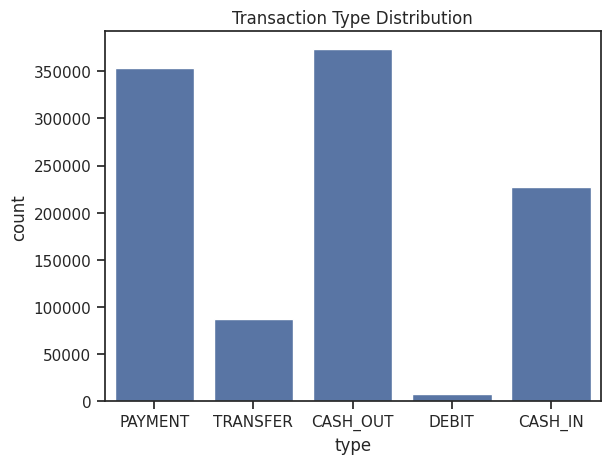

In [ ]:
sns.countplot(x='type', data=Fraud_D)
plt.title('Transaction Type Distribution')
plt.show()

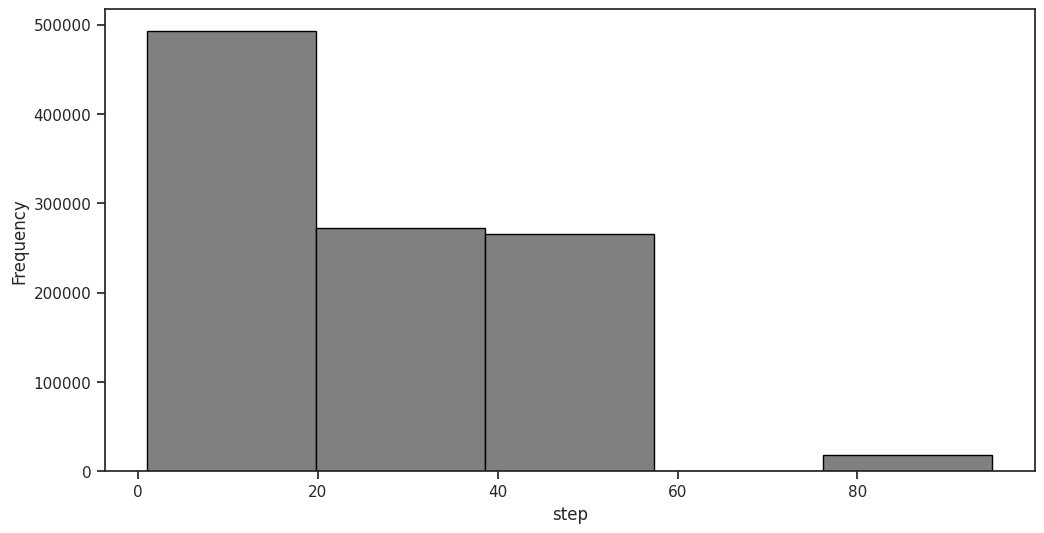

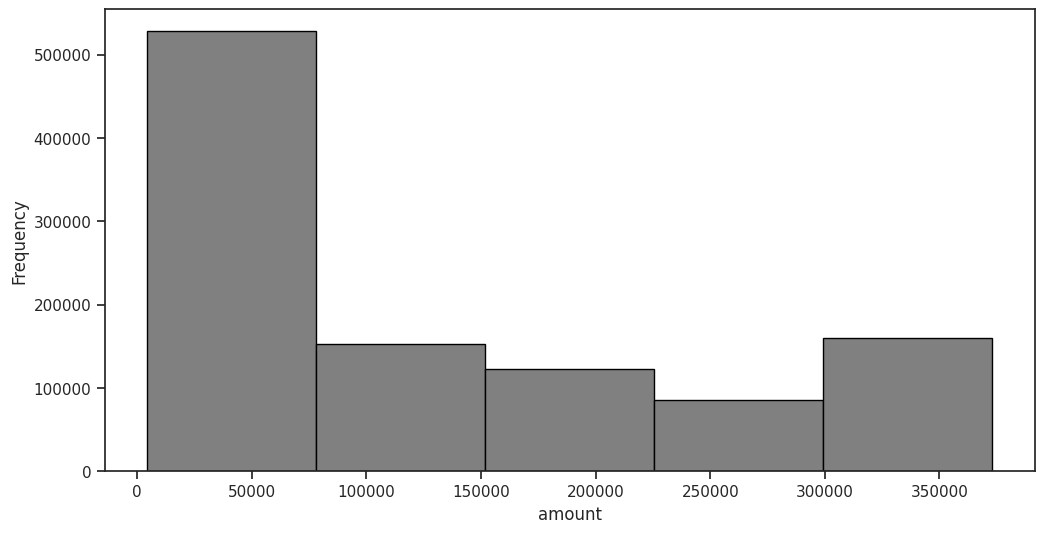

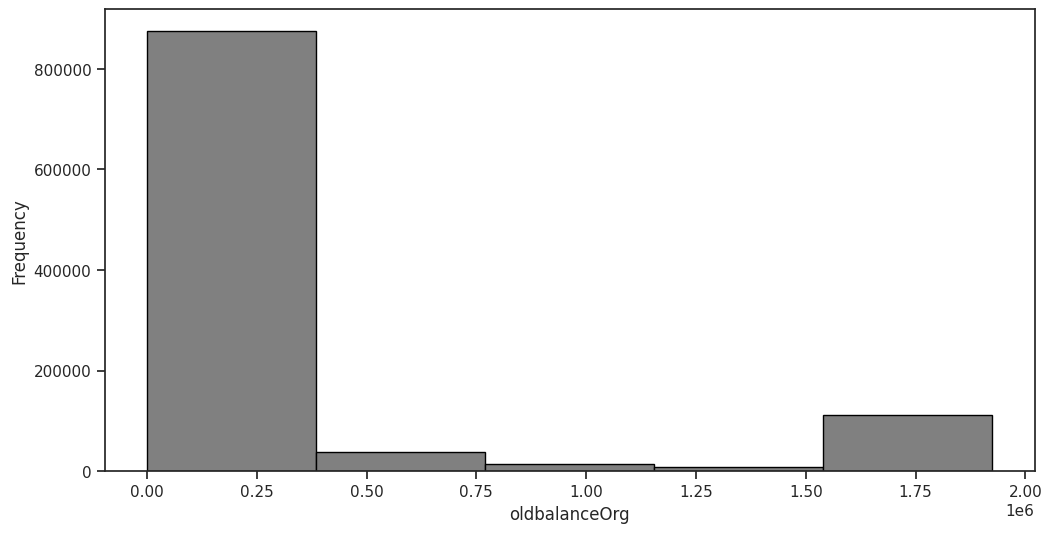

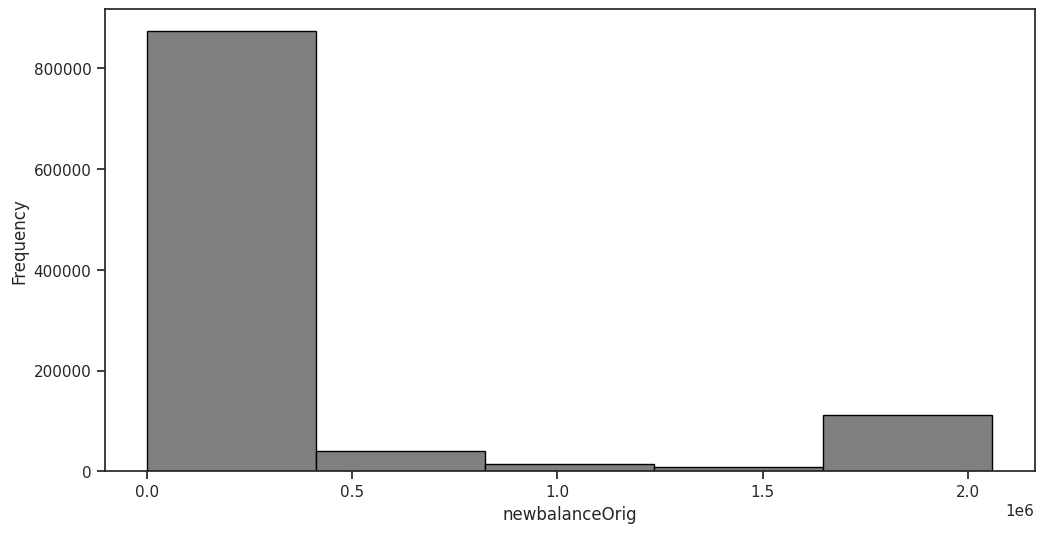

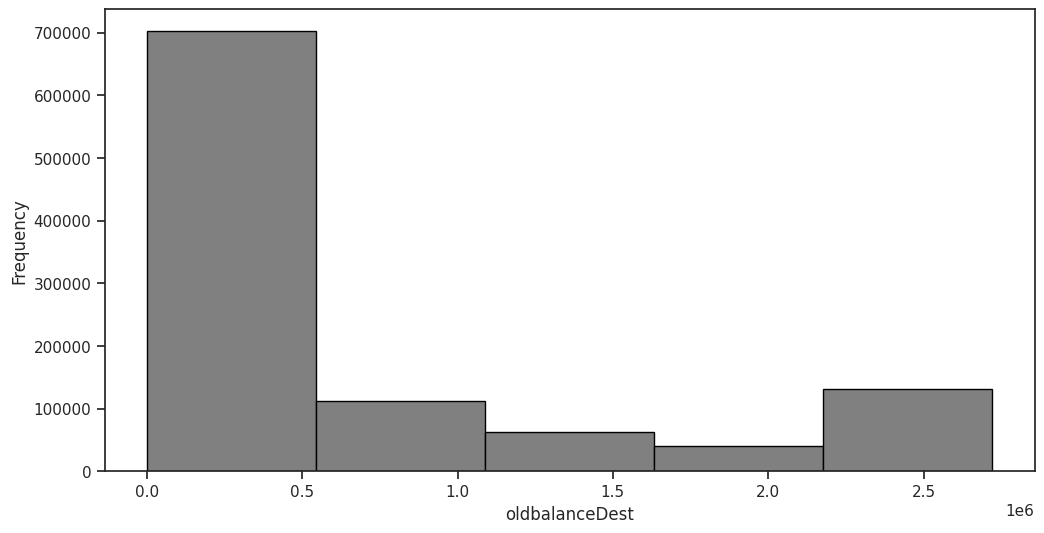

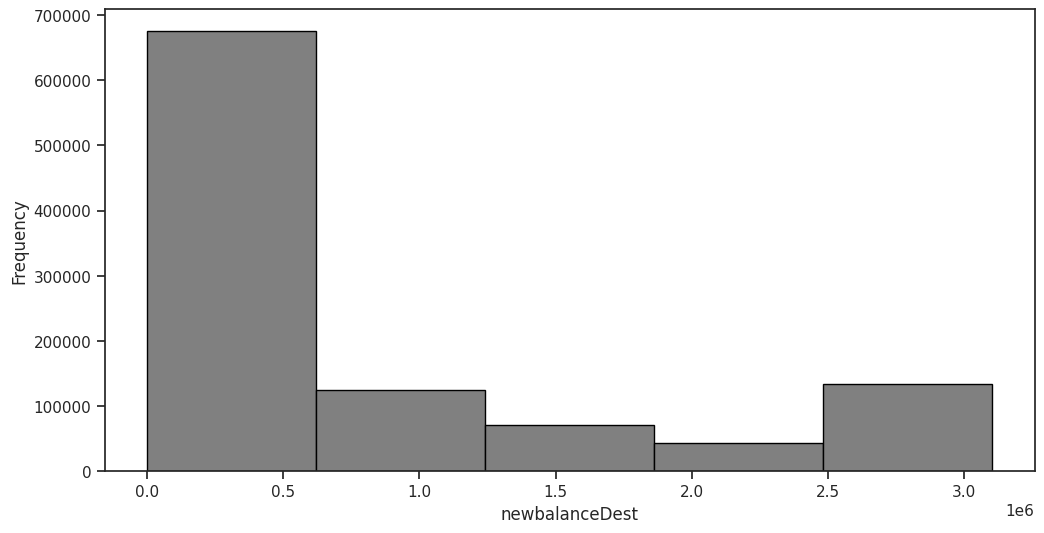

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    Fraud_D[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

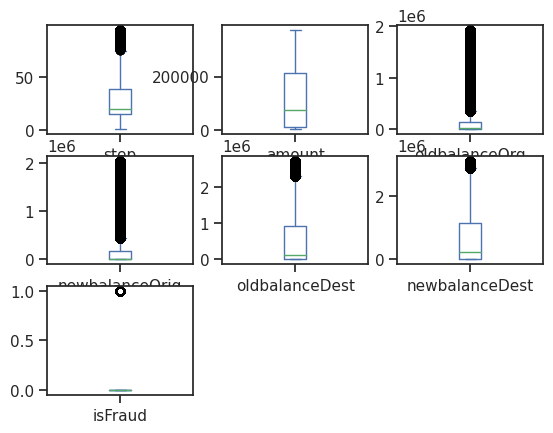

In [ ]:
Fraud_D.plot(kind="box" , subplots=True , layout=(3,3))
plt.show()

<ipython-input-117-3c4b5ac3c3a8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='isFraud', data=Fraud_D, palette='PuBu')


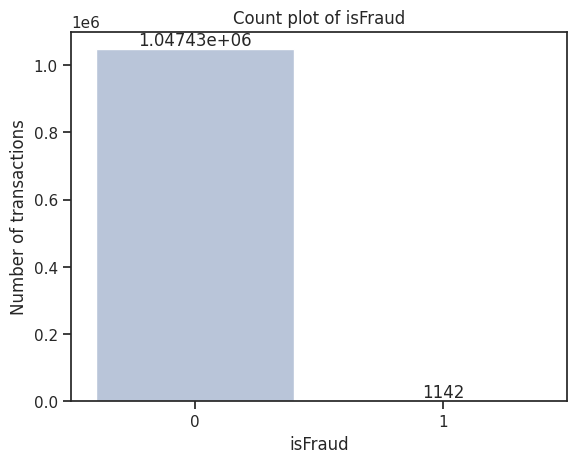

In [ ]:
ax = sns.countplot(x='isFraud', data=Fraud_D, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of isFraud')
plt.ylabel('Number of transactions')

del ax

<ipython-input-3-0c8e29bab71e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Fraud_D['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

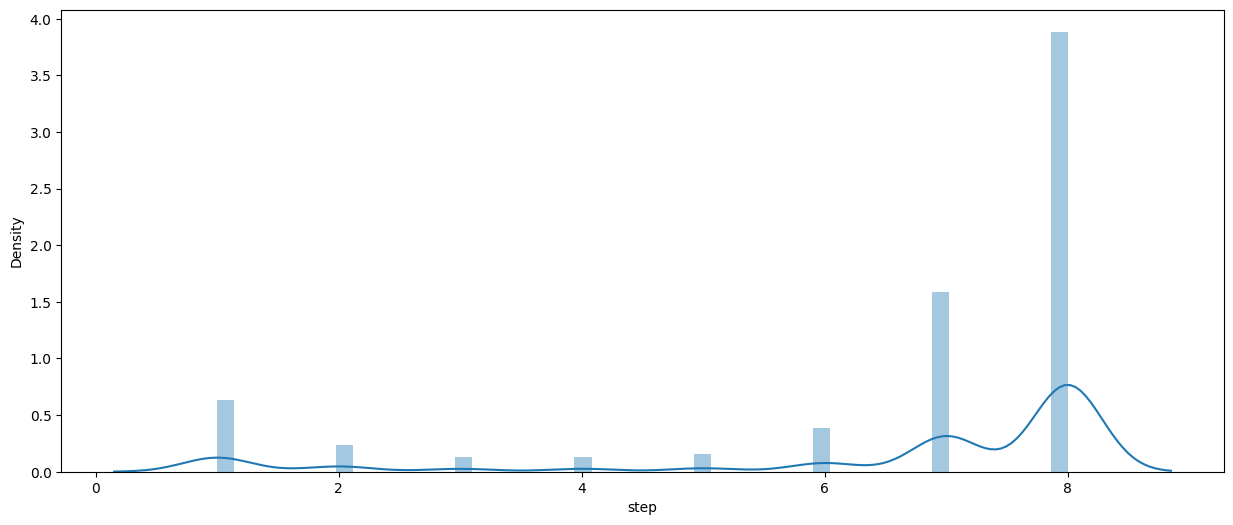

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(Fraud_D['step'], bins=50)

<ipython-input-118-b6d6c1337e34>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Fraud_D['amount'],palette='Set1')


<Axes: xlabel='amount'>

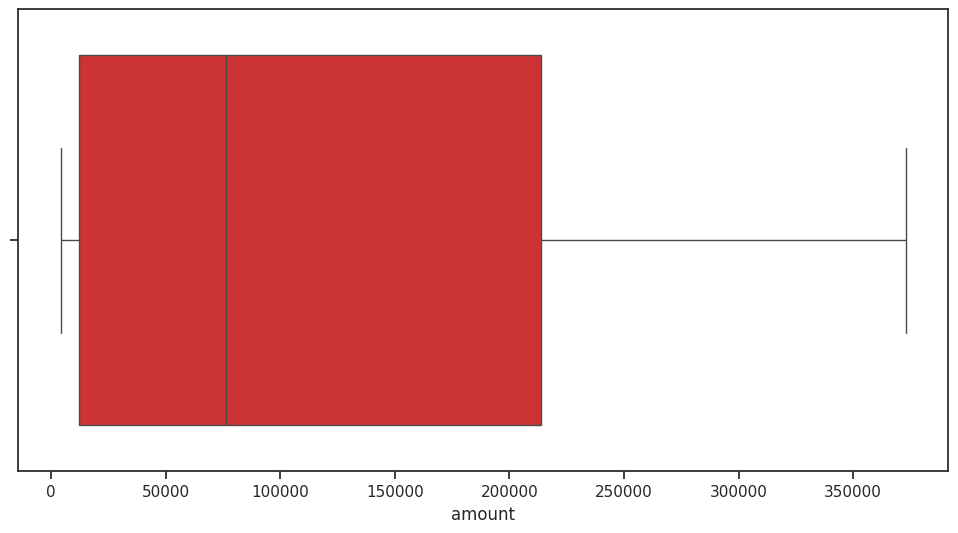

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=Fraud_D['amount'],palette='Set1')

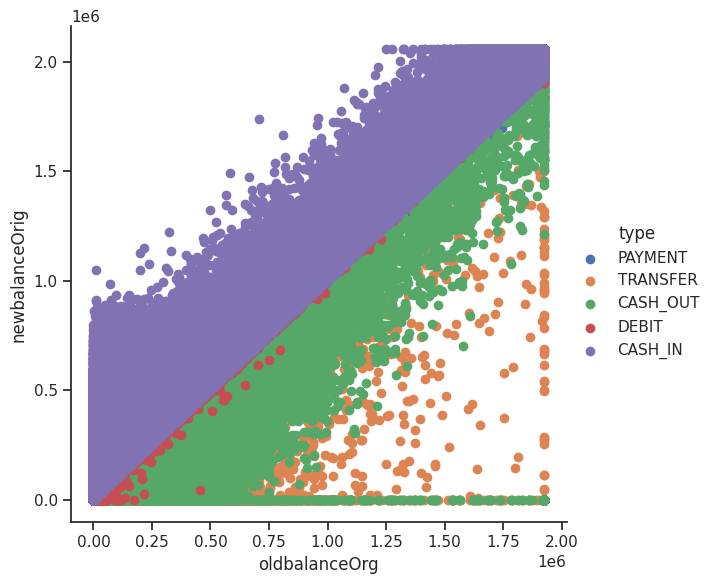

In [ ]:
sns.FacetGrid(Fraud_D, hue ="type",
              height = 6).map(plt.scatter,
                              'oldbalanceOrg',
                              'newbalanceOrig').add_legend()

<ipython-input-120-c1a6897a2c16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=Fraud_D.corr()


<Axes: >

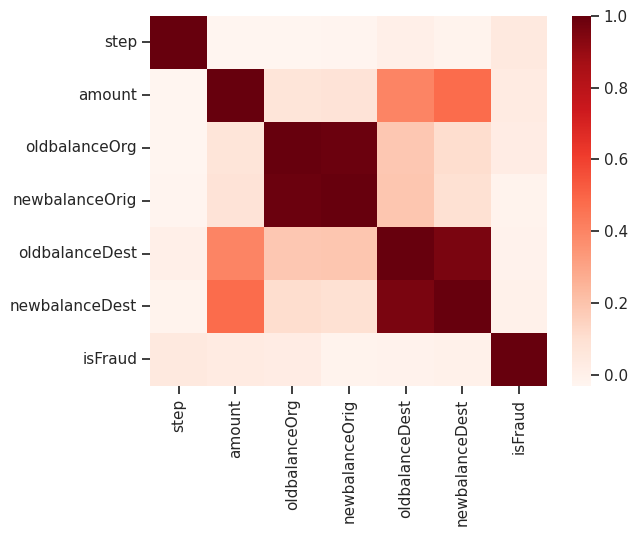

In [ ]:
corr=Fraud_D.corr()
sns.heatmap(corr,cmap="Reds")

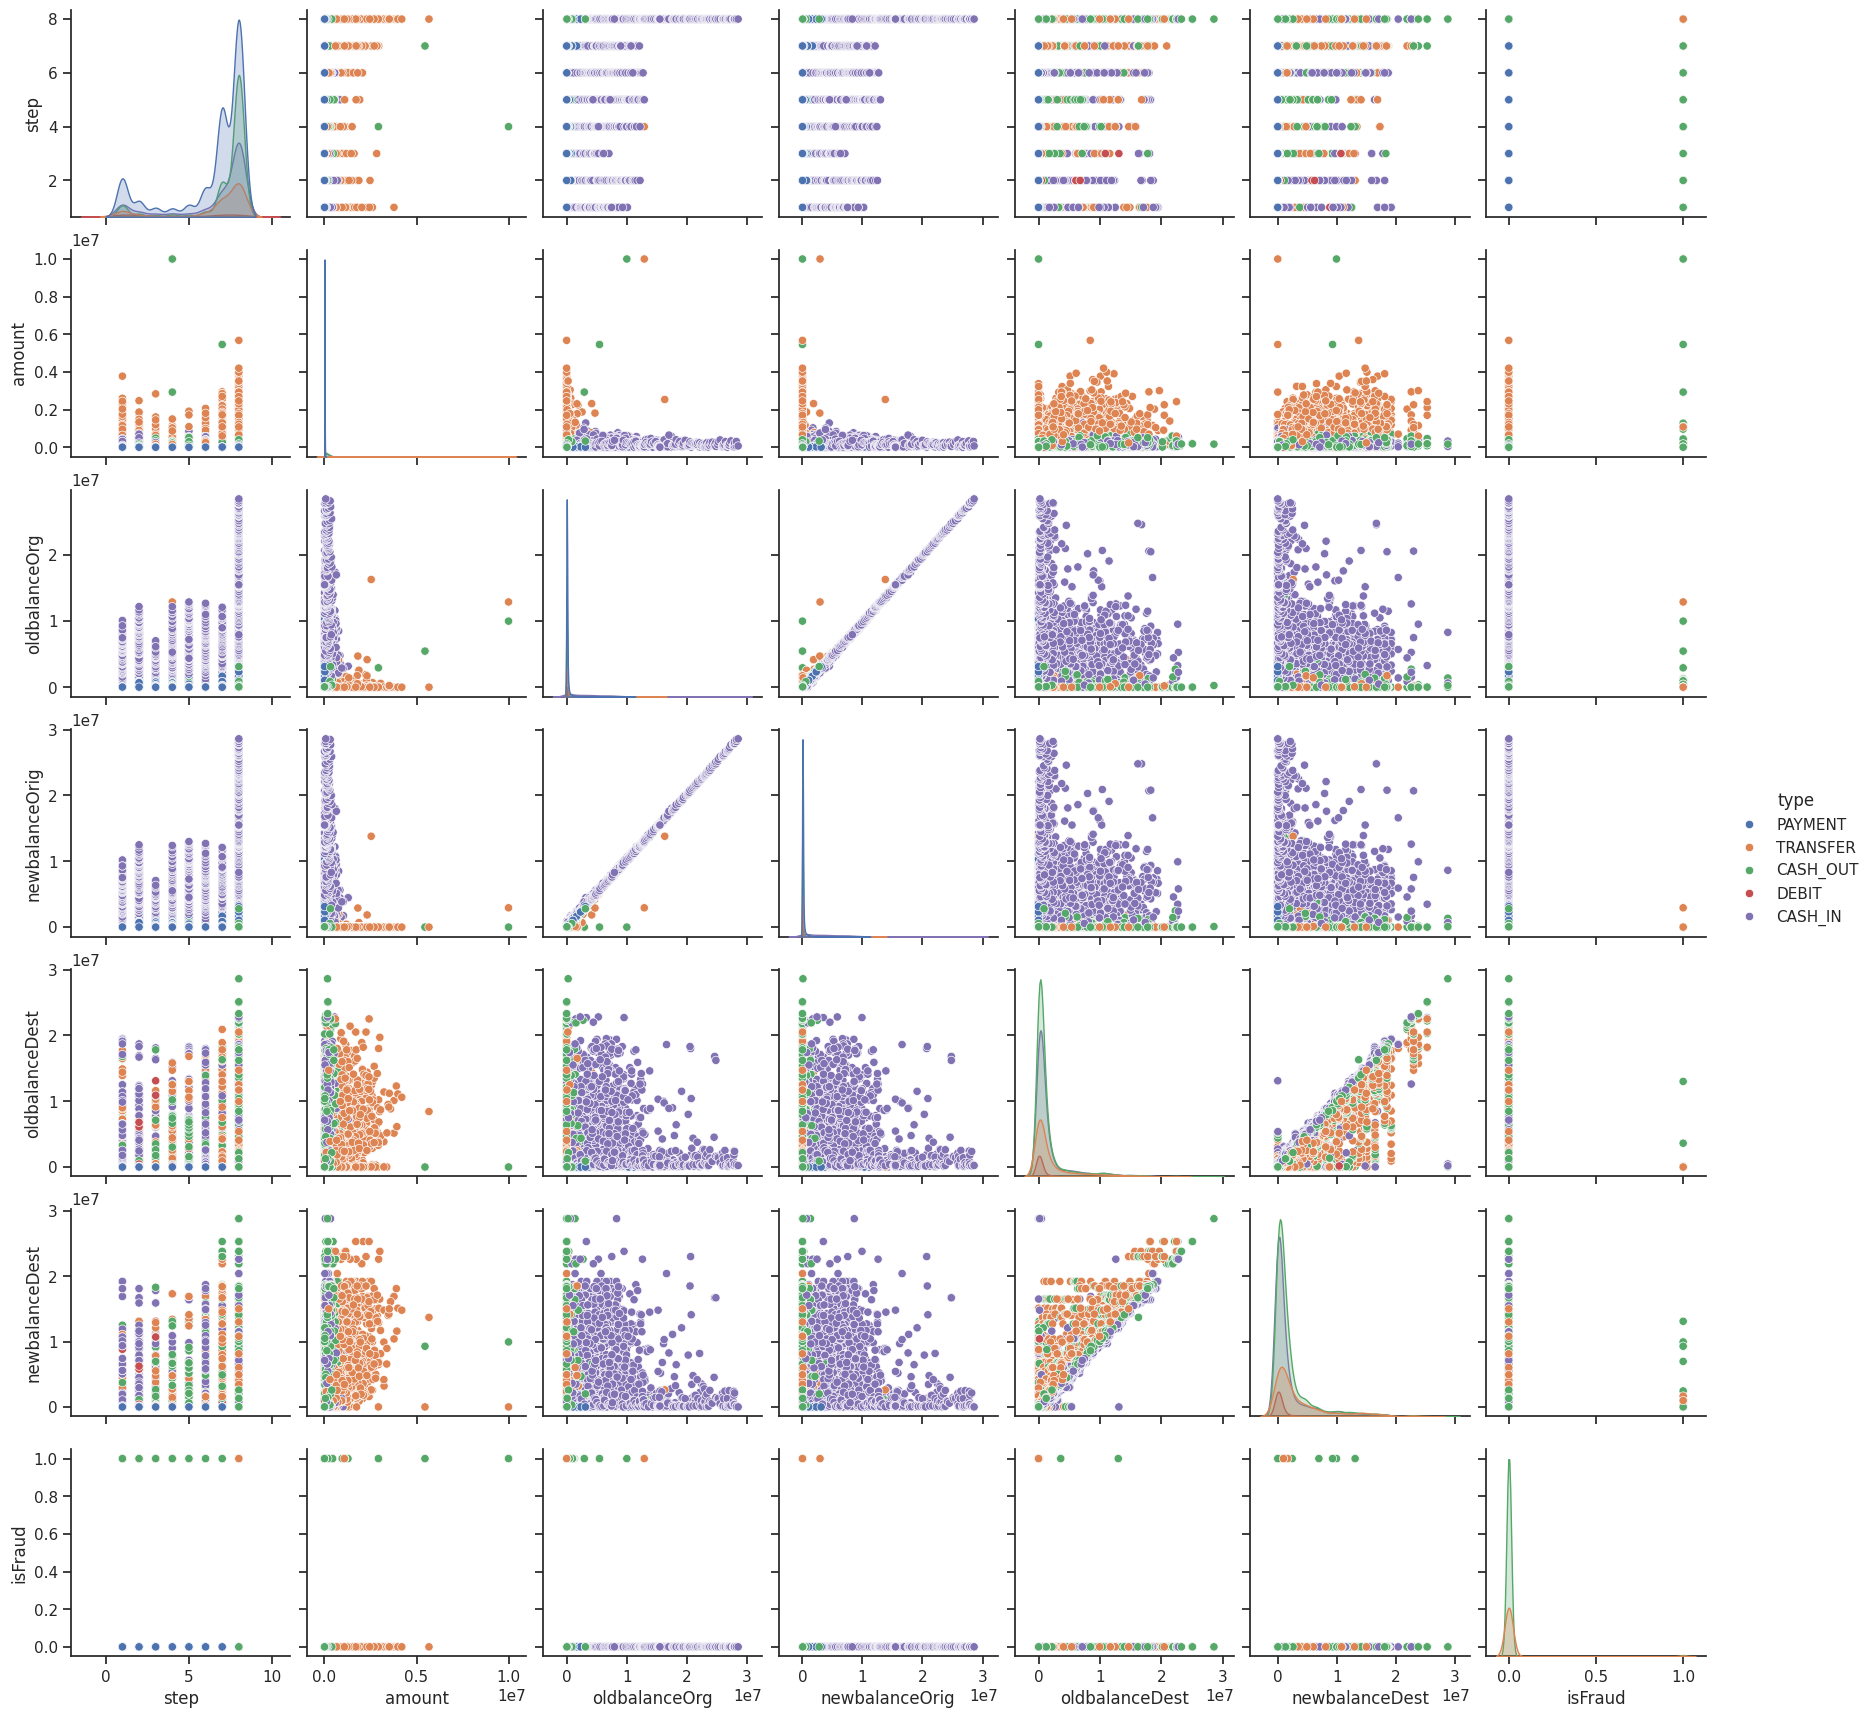

In [ ]:
sns.set(style="ticks")
sns.pairplot(Fraud_D, hue="type")
plt.show()

##**7. Machine Learning**

In [ ]:
Fraud_D['type'] = Fraud_D['type'].map({"CASH_OUT":1, "PAYMENT" :2,
                                       "CASH_IN" :3, "TRANSFER":4,
                                       "DEBIT":5})
Fraud_D.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


# **8. Splitting Data for Training and Testing**
Before Training the model, it is required to split the data into train and test data. For this we will use, sklearn's `train_test_split`


In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(Fraud_D[['type','amount','oldbalanceOrg','newbalanceOrig']])
Y = np.array(Fraud_D[['isFraud']])

In [ ]:
Fraud_D = Fraud_D.fillna(0)
Fraud_D.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


# **9. Training the Models**
Preciesly, we will be trying more than one model, therefore, Training the `Models`

#**Decision Tree Classifier**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=7)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
model.score( X_test, Y_test )

0.9993637237712799

# **10. Prediction Time**
Predicting the Fraud using feautres.

In [ ]:
# feautures = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']
feautures = np.array([[4, 9000.60, 9000.60,0.0]])
print(model.predict(feautures))

[1.]


In [ ]:
feautures1 =np.array([[2, 1864.28, 21249.0, 0.0]])
print(model.predict(feautures1))

[0.]


In [ ]:
feautures2 =np.array([[1, 181.00, 181.00, 0.0]])
print(model.predict(feautures2))

[1.]


In [ ]:
feautures3 =np.array([[5, 41898 ,40348.79 , 0.0]])
print(model.predict(feautures3))

[0.]


#**11. Logistic Regression**

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
prediction=logmodel.predict([[4, 9000.60, 9000.60,0.0]])
prediction

array([0.])

In [ ]:
prediction=logmodel.predict([[2, 1864.28, 21249.0, 0.0]])
prediction

array([0.])

In [ ]:
prediction=logmodel.predict([[1, 181.00, 181.00, 0.0]])
prediction

array([0.])

In [ ]:
prediction=logmodel.predict([[5, 41898 ,40348.79 , 0.0]])
prediction

array([0.])

In [ ]:
prediction1=logmodel.predict(X_test)
prediction1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
accuracy1=(accuracy_score(Y_test,prediction1))*100
print(accuracy1,"%")

99.9237063457247 %


[[104731      4]
 [    76     47]]


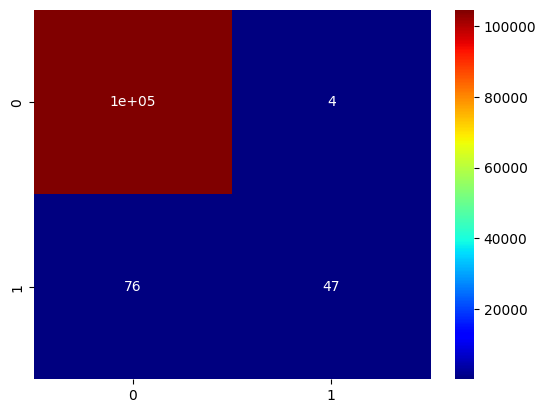

In [ ]:
confusion1=confusion_matrix(Y_test,prediction1)
print(confusion1)
sns.heatmap(confusion1,cmap="jet",annot=True)
plt.show()

In [ ]:
classification1=classification_report(Y_test,prediction1)
classification1

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    104735\n           1       0.92      0.38      0.54       123\n\n    accuracy                           1.00    104858\n   macro avg       0.96      0.69      0.77    104858\nweighted avg       1.00      1.00      1.00    104858\n'

# **12. SVM (support vector machine)**

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
svcmodel=SVC()
svcmodel.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
prediction1=logmodel.predict(X_test)
prediction1

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
Y_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
accuracy1=(accuracy_score(Y_test,prediction1))*100
print(accuracy1,"%")

99.75577987626181 %


[[6125    0]
 [  15    2]]


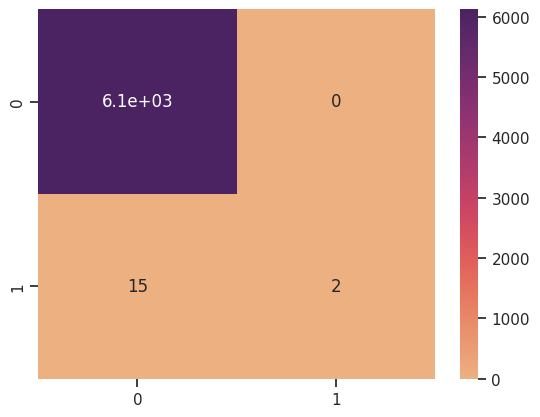

In [ ]:
confusion1=confusion_matrix(Y_test,prediction1)
print(confusion1)
sns.heatmap(confusion1,cmap="flare",annot=True)
plt.show()

In [ ]:
classification1=classification_report(Y_test,prediction1)
classification1

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00      6125\n         1.0       1.00      0.12      0.21        17\n\n    accuracy                           1.00      6142\n   macro avg       1.00      0.56      0.60      6142\nweighted avg       1.00      1.00      1.00      6142\n'

# **13. KNeighborsClassifier**

In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
model=KNeighborsClassifier()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
prediction4=model.predict(X_test)
prediction4

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy4=(accuracy_score(Y_test,prediction4))*100
print(accuracy4,"%")

99.77206121784435 %


[[6120    5]
 [   9    8]]


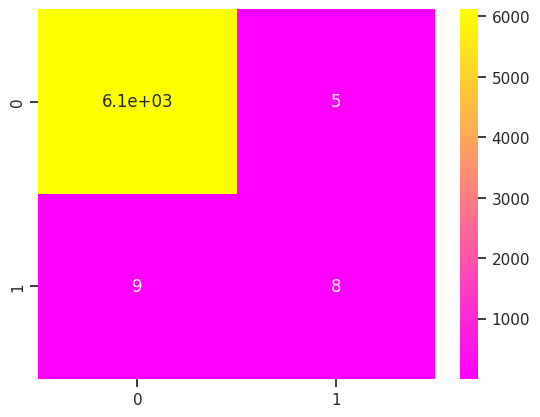

In [ ]:
confusion4=confusion_matrix(Y_test,prediction4)
print(confusion4)
sns.heatmap(confusion4, cmap="spring", annot=True)
plt.show()

In [ ]:
classification4=classification_report(Y_test,prediction4)
classification4

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00      6125\n         1.0       0.62      0.47      0.53        17\n\n    accuracy                           1.00      6142\n   macro avg       0.81      0.73      0.77      6142\nweighted avg       1.00      1.00      1.00      6142\n'

# **14. Interface - Using Machine Learning Model**

In [ ]:
prediction=logmodel.predict([[4, 9000.60, 9000.60,0.0]])
prediction

array([0.])

In [ ]:
# type,  amount, oldbalanceOrg, newbalanceOrig
type = 4
amount = 9000.60
oldbalanceOrg =  9000.60
newbalanceOrig = 0.0
# prediction=logmodel.predict([[4, 9000.60, 9000.60,0.0]])
prediction=logmodel.predict([[type, amount, oldbalanceOrg,newbalanceOrig]])
if prediction[0]==0:
  print("Fraud")
else :
  print("No Fraud")


Fraud


In [ ]:
prediction=logmodel.predict([[2, 1864.28, 21249.0, 0.0]])
prediction

array([0.])

In [ ]:
# type,  amount, oldbalanceOrg, newbalanceOrig
type = 2
amount = 1864.28
oldbalanceOrg = 21249.0
newbalanceOrig = 0.0
# prediction=logmodel.predict([[2, 1864.28, 21249.0, 0.0]])
prediction=logmodel.predict([[type, amount, oldbalanceOrg,newbalanceOrig]])
if prediction[0]==1:
  print("Fraud")
else :
  print("No Fraud")


No Fraud


In [ ]:
type  =  eval(input ("Enter type : "))
amount = eval(input ("Have amount: "))
oldbalanceOrg = eval(input ("Have oldbalanceOrg : "))
newbalanceOrig   = eval(input ("Enter newbalanceOrig : "))
# prediction=logmodel.predict([[4, 9000.60, 9000.60,0.0]])
prediction=logmodel.predict([[type, amount, oldbalanceOrg,newbalanceOrig]])
if prediction[0]==0:
  print("Fraud")
else :
  print("No Fraud")

Enter type : 4
Have amount: 9000.60
Have oldbalanceOrg : 9000.60
Enter newbalanceOrig : 0.0
Fraud


In [ ]:
type  =  eval(input ("Enter type : "))
amount = eval(input ("Have amount: "))
oldbalanceOrg = eval(input ("Have oldbalanceOrg : "))
newbalanceOrig   = eval(input ("Enter newbalanceOrig : "))
# prediction=logmodel.predict([[2, 1864.28, 21249.0, 0.0]])
prediction=logmodel.predict([[type, amount, oldbalanceOrg,newbalanceOrig]])
if prediction[0]==1:
  print("Fraud")
else :
  print("No Fraud")

Enter type : 2
Have amount: 1864.28
Have oldbalanceOrg : 21249.0
Enter newbalanceOrig : 0.0
No Fraud


#**15.  All together**

In [ ]:
X = np.array(Fraud_D[['type','amount','oldbalanceOrg','newbalanceOrig']])
Y = np.array(Fraud_D[['isFraud']])
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression( max_iter=120)
logmodel.fit(X,Y)
prediction=logmodel.predict([[4, 9000.60, 9000.60,0.0]])
prediction=logmodel.predict([[type, amount, oldbalanceOrg,newbalanceOrig]])
print (prediction[0])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0


In [ ]:
type  =  eval(input ("Enter type : "))
amount = eval(input ("Have amount: "))
oldbalanceOrg = eval(input ("Have oldbalanceOrg : "))
newbalanceOrig   = eval(input ("Enter newbalanceOrig : "))
# prediction=logmodel.predict([[4, 9000.60, 9000.60,0.0]])
prediction=logmodel.predict([[type, amount, oldbalanceOrg,newbalanceOrig]])
if prediction[0]==0:
  print("Fraud")
else :
  print("No Fraud")

Enter type : 4
Have amount: 9000.60
Have oldbalanceOrg : 9000.60
Enter newbalanceOrig : 0.0
Fraud
